### SKILLCRAFT TECHNOLOGY DATA SCIENCE INTERNSHIP TASK 4

### Step 1: Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the dataset in chunks

In [3]:
file_path = r"C:\Users\Lenovo\Downloads\US_Accidents_March23.csv"
chunk_size = 100000  # Read 100,000 rows at a time
df_chunks = pd.read_csv(file_path, chunksize=chunk_size)

### Step 3: Process the first chunk (for analysis without memory overload)

In [4]:
df = next(df_chunks)

### Step 4: Data Exploration

In [5]:
print("Dataset Overview:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False         

### Step 5: Data Cleaning

In [6]:
# Drop columns with too many missing values
df = df.drop(columns=['Number', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1, errors='ignore')

# Fill missing values in Weather and Road conditions with the most frequent value
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)
df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode()[0], inplace=True)

# Convert "Start_Time" to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

### Step 6: Accident Trends Analysis

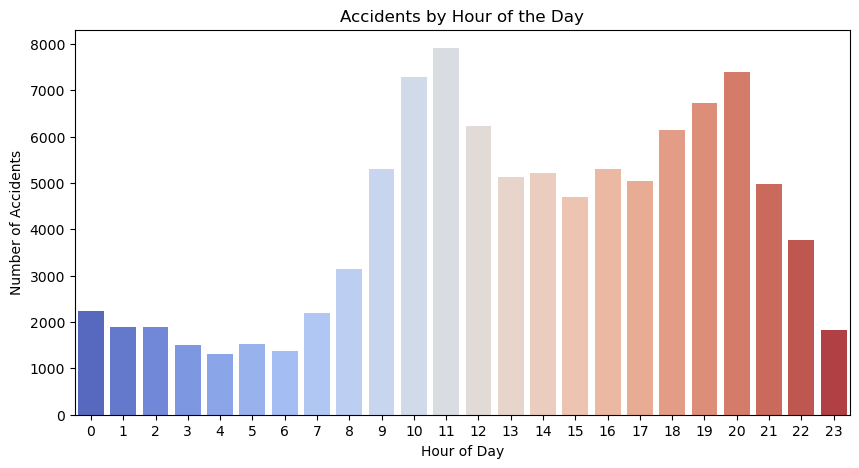

In [7]:
plt.figure(figsize=(10, 5))
df['Hour'] = df['Start_Time'].dt.hour
sns.countplot(x=df['Hour'], palette="coolwarm")
plt.title("Accidents by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()

### Step 7: Impact of Weather on Accidents

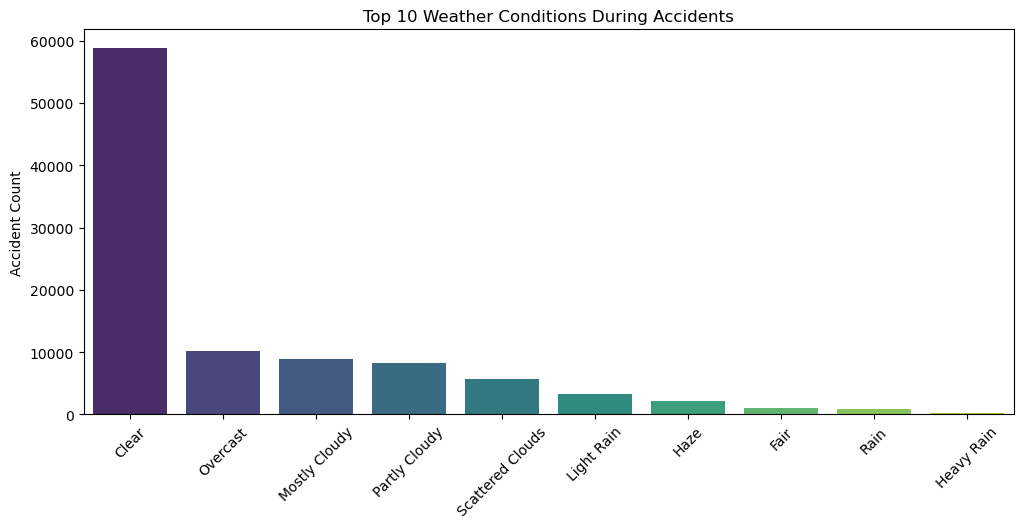

In [8]:
plt.figure(figsize=(12, 5))
top_weather_conditions = df['Weather_Condition'].value_counts().nlargest(10)
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette="viridis")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xticks(rotation=45)
plt.ylabel("Accident Count")
plt.show()


### Step 8: Visualizing Accident Hotspots using Scatter Plot

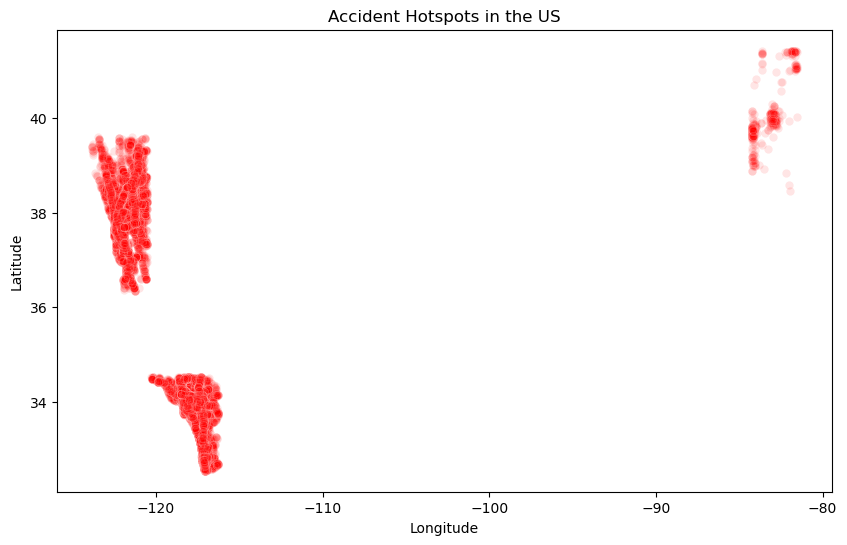

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Start_Lng'], y=df['Start_Lat'], alpha=0.1, color='red')
plt.title("Accident Hotspots in the US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Step 9: Heatmap of correlation

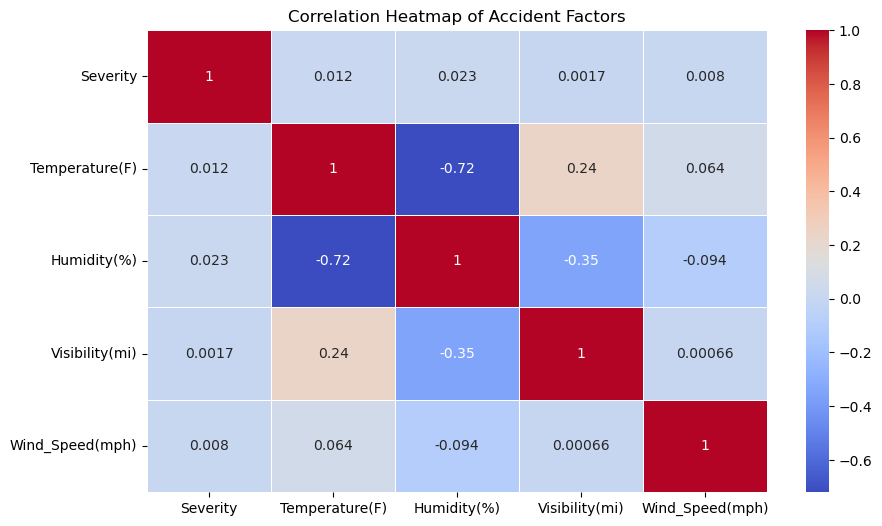

In [10]:
plt.figure(figsize=(10, 6))
numerical_features = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
df_numeric = df[numerical_features].dropna()  # Drop NaN values for accurate correlation
corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Accident Factors")
plt.show()

### Step 10: Analyze time of day trends

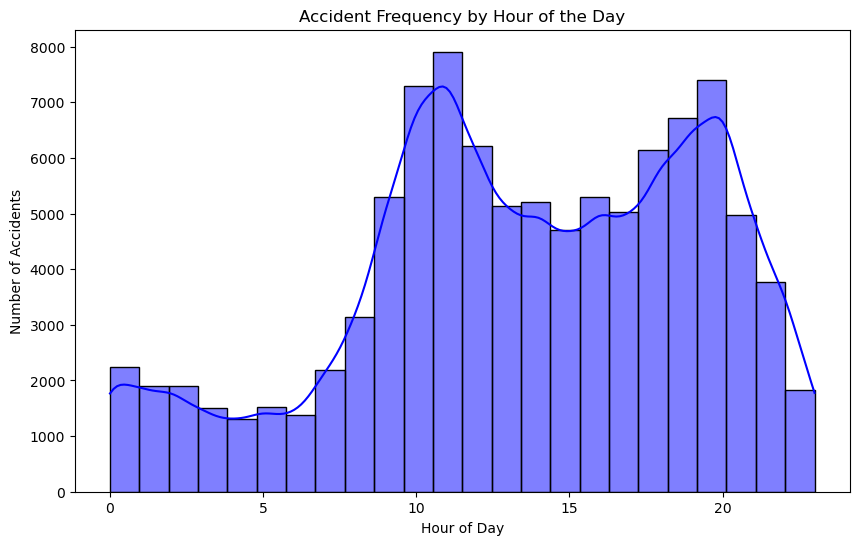

In [11]:
# Convert Start_Time to datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour of accident
df['Hour'] = df['Start_Time'].dt.hour

# Plot accident counts by hour
plt.figure(figsize=(10,6))
sns.histplot(df['Hour'], bins=24, kde=True, color='blue')
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.show()